<br><br><center><h1 style="font-size:2.7em;color:#000">MACHINE LEARNING LAB - TUTORIAL 7</h1></center>
<br>
<h1 style="font-size:2em;color:#000">Juan Fernando Espinosa</h1>
<h1 style="font-size:2em;color:#000">303158</h1>

---
<h3 style="font-size:2em;color:#ff4411">1. DATA PRE-PROCESSING</h3>

In [46]:
import pandas as pd
import numpy as np
from collections import Counter
import math
import matplotlib.pyplot as plt

<h3 style="font-size:1.5em;color:#2467C0">D1 DATA - IRIS</h3>

The dataset used is the Iris dataset and the main goal of the implementation is to classify the test set to the nearest class. 

----

In [47]:
missing_values = ['-','na','Nan','nan','n/a','?']
column_names_iris = ['Sepal length in cm','Sepal width in cm','Petal length in cm','Petal width in cm','Class']
D1 = pd.read_csv("iris.data", sep=',', na_values = missing_values, names=column_names_iris)
D1.head()

,Sepal length in cm,Sepal width in cm,Petal length in cm,Petal width in cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
# Check for missing or incongruent values
check = D1.empty
print('checking missing values:',check)
print('Sum of errors:',D1.isnull().sum())

checking missing values: False
Sum of errors: Sepal length in cm    0
Sepal width in cm     0
Petal length in cm    0
Petal width in cm     0
Class                 0
dtype: int64


### SPLIT DATA 70% TRAIN 30% TEST

In [79]:
D1_train = D1.sample(frac=0.7, random_state=1)
D1_test = D1.drop(D1_train.index)

In [80]:
Y_train = D1_train['Class'].values
X_train = D1_train.drop(['Class'], axis=1).values
Y_test = D1_test['Class'].values
X_test = D1_test.drop(['Class'], axis=1).values

### IMPLEMENT K-NEAREST NEIGHBOUR (KNN)

In [81]:
rows= []
rows_All = []
Each_row = []
k_nearest_array = []
array_k_nearest_index = []
new_class = []
final_classes = []
k = 3
scatter = []

# measuring the distance for each row of test set with each row of training set
for index, j in enumerate(X_test):
    row = []
    for index, i in enumerate(X_train):
        count = 0
        distance = math.sqrt(sum((i - j) ** 2)) # Euclidean distance.
        count += distance
        row.append((count, index))
        row.sort()
    rows_All.append(row)

# Extracting the index of each row to further select the class. 
for i in range(len(rows_All)):
    k_nearest = (rows_All[i][:k])
    k_nearest_array = []
    for j in range(len(k_nearest)):
        p = (k_nearest[j][1])
        k_nearest_array.append(p)
    array_k_nearest_index.append(k_nearest_array)


# Matching each index to the respective class
assign_class = []
for j in range(len(array_k_nearest_index)):
    u = []
    classification=[]
    for h in (array_k_nearest_index[j]):
        for l in range(len(Y_train)):
            if h == l:
                clas=Y_train[l]
                u.append(clas)
    classification.append(u)

# Selecting the most common class for each row of test data.
    
    for p in classification:
        p2 = np.array(p).flatten()
        a = Counter(p2).most_common(1)[0][0]
        final_classes.append(a)

In [85]:
# Outcome of the exercise with the number of correctly matched classes and Accuracy value
count = 0
boolean = []

for i in range(len(final_classes)):
    if final_classes[i] == Y_test[i]:
        count+=1
        answer = 'Match'
        boolean.append(answer)
    else:
        answer = 'Wrong'
        boolean.append(answer)
print('Correctly matched classes:',count)
accuracy = count/len(final_classes)
print('Accuracy of prediction:',accuracy)

Correctly matched classes: 42
Accuracy of prediction: 0.9333333333333333


In [88]:
dataset = pd.DataFrame({'Predicted Class': final_classes, 'Y test Class': Y_test, 'Accuracy of matches': boolean})

def not_match(val):
    color = 'red' if val == 'Wrong' else 'black'
    return 'color: %s' % color

df = dataset.style.applymap(not_match)
df

,Predicted Class,Y test Class,Accuracy of matches
0,Iris-setosa,Iris-setosa,Match
1,Iris-setosa,Iris-setosa,Match
2,Iris-setosa,Iris-setosa,Match
3,Iris-setosa,Iris-setosa,Match
4,Iris-setosa,Iris-setosa,Match
5,Iris-setosa,Iris-setosa,Match
6,Iris-setosa,Iris-setosa,Match
7,Iris-setosa,Iris-setosa,Match
8,Iris-setosa,Iris-setosa,Match
9,Iris-setosa,Iris-setosa,Match


 <h3 style="font-size:1.5em;color:#6e00db">Observations</h3>
 
 ---
<ol>
    <li>The measure of accuracy chosen is a division between the sum of all accurate predicted classes by the total number of entries. This measure is chosen considering the fact of a <strong>supervised learning</strong> algorithm where all the right classes are known. Moreover, since it is a classification model it is feasible to compare 'right match' and 'wrong match' classes. Consequently, it is an instinctive way of measuring accuracy. </li>
</ol>

### DETERMINE OPTIMAL VALUE OF K IN KNN ALGORITHM.

In [31]:
rows= []
rows_All = []
Each_row = []
k_nearest_array = []
array_k_nearest_index = []
new_class = []
final_classes = []
accuracy_array = []
final_Accuracy = []
plot_k = []
plot_error = []
k = [2, 3, 5, 6, 7, 8, 10, 12, 13, 21]

# Iterating through each value of K
# measuring the distance for each row of test set with each row of training set
for q in k:
    final_Accuracy = []
    print('K:',q)
    for index, j in enumerate(X_test):
        row = []
        for index, i in enumerate(X_train):
            count = 0
            distance = math.sqrt(sum((i - j) ** 2))
            count += distance
            row.append((count, index))
            row.sort()
        rows_All.append(row)

    # Extracting the index of each row to further select the class. 
    for i in range(len(rows_All)):
        k_nearest = (rows_All[i][:q])
        k_nearest_array = []
        for j in range(len(k_nearest)):
            p = (k_nearest[j][1])
            k_nearest_array.append(p)
        array_k_nearest_index.append(k_nearest_array)

    # Matching each index to the respective class
    assign_class = []
    for j in range(len(array_k_nearest_index)):
        u = []
        classification=[]
        for h in (array_k_nearest_index[j]):
            for l in range(len(Y_train)):
                if h == l:
                    clas=Y_train[l]
                    u.append(clas)
        classification.append(u)


        # Selecting the most common class for each row of test data.

        for p in classification:
            p2 = np.array(p).flatten()
            a = Counter(p2).most_common(1)[0][0]
            final_classes.append(a)
    
    count = 0
    boolean = []

    for i in range(len(final_classes)):

        if final_classes[i] == Y_test[i]:
            count+=1
            answer = 'Match'
            boolean.append(answer)
        else:
            answer = 'Wrong'
            boolean.append(answer)
    print('Correctly matched classes:',count)
    accuracy = count/len(final_classes)
    error = 1 - accuracy
    plot_k.append(q)
    plot_error.append(error)
    print('Accuracy of prediction:',accuracy)
    print('Error of prediction:',error)
    optimal_Results = (accuracy, q)
    accuracy_array.append(optimal_Results)
    rows= []
    rows_All = []
    Each_row = []
    k_nearest_array = []
    array_k_nearest_index = []
    new_class = []
    final_classes = []
optimum_value = max(accuracy_array)
print('\n','Higher Accuracy prediction & Optimum K:', optimum_value)

K: 2
Correctly matched classes: 41
Accuracy of prediction: 0.9111111111111111
Error of prediction: 0.0888888888888889
K: 3
Correctly matched classes: 42
Accuracy of prediction: 0.9333333333333333
Error of prediction: 0.06666666666666665
K: 5
Correctly matched classes: 42
Accuracy of prediction: 0.9333333333333333
Error of prediction: 0.06666666666666665
K: 6
Correctly matched classes: 42
Accuracy of prediction: 0.9333333333333333
Error of prediction: 0.06666666666666665
K: 7
Correctly matched classes: 42
Accuracy of prediction: 0.9333333333333333
Error of prediction: 0.06666666666666665
K: 8
Correctly matched classes: 42
Accuracy of prediction: 0.9333333333333333
Error of prediction: 0.06666666666666665
K: 10
Correctly matched classes: 43
Accuracy of prediction: 0.9555555555555556
Error of prediction: 0.0444444444444444
K: 12
Correctly matched classes: 43
Accuracy of prediction: 0.9555555555555556
Error of prediction: 0.0444444444444444
K: 13
Correctly matched classes: 44
Accuracy of p

### Plotting the Error of each k

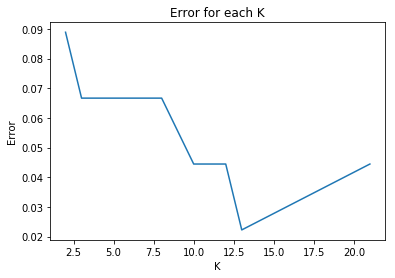

In [89]:
plt.plot(plot_k, plot_error)
plt.title('Error for each K')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

 <h3 style="font-size:1.5em;color:#6e00db">Observations</h3>
 
 ---
<ol>
    <li>Considering the different variations of <strong>K</strong> selected all predictions are working with high accuracy for classifying each datapoint.</li><br>
    <li> Cross validation is not used in this exercise because this is not a training model.</li><br>
    <li>Surprisingly, one could say that the higher the number of K we add to the model the more accurate the model will work. That observation is partly true. Finding the optimal K value and plotting the error helps to avoid silly decisions based on partial information. Identifying the ideal value for which classification works out well means that if adding +-1 to k will decrease the accuracy.</li><br>
    <li>There are a few number of k's with the same accuracy value. In this exercise all of them are sequentially. Therefore, in a real world application it would mislead the final classification output. It is always good to test with different values of k and specially if they are not sequentially to see the real impact of accuracy for different k's.</li><br>
    <li> being questioning myself what would happen if for a specific k there is a tie between categories. A good practice is to use odd number of k instead of chossing a random classification from the options.</li><br>
    <li> The model works automatically and it is possible to add more K values. The printing of each K results is just for an easy comparison between Ks.</li>

</ol>